# <font color= orange> **Name : Sudeesh Kumar V** <font color= orange> 
 
# **Rollno : CH.EN.U4AIE22059**
# **22AIE315 - NLP**
# **Lab - 3**

#  <p><font color="orange">AIM :</font></p>

### <p><font color="lightblue"> To explore various various techniques for word embedding, including One-Hot Encoding, Bag of Words with CountVectorizer, Tf-Idf (term frequency-inverse document frequency), Word2Vec, and GloVe etc. </font></p>

# <p><font color="orange">3.a) One-Hot encoding</font></p>

- ### One-hot encoding is a method commonly used in machine learning and natural language processing to transform categorical data into a binary format. Essentially, it converts categories, which are distinct values from a set, into a binary matrix where each category gets its own column. This makes it easier for machine learning models to work with non-numeric data by representing each category as a vector of 0s and 1s.

In [1]:
import numpy as np

In [2]:
import numpy as np

# Step 1: Convert Text to Lower case
text = "My Name is Sudeesh Kumar V"
text_lower = text.lower()

# Step 2: Tokenize the text
tokens = text_lower.split()

# Step 3: Get unique words
unique_words = set(tokens)

# Step 4: Sort the word List
sorted_words = sorted(unique_words)

# Step 5: Get the integer/position of the words
word_to_index = {word: index for index, word in enumerate(sorted_words)}

# Step 6 and 7: Create one-hot vectors and matrix
one_hot_matrix = np.zeros((len(tokens), len(unique_words)))

for i, token in enumerate(tokens):

    word_index = word_to_index[token]
    one_hot_matrix[i, word_index] = 1

# Display the results
print("Original Text:", text)
print("One-Hot Matrix:")
print(one_hot_matrix)

Original Text: My Name is Sudeesh Kumar V
One-Hot Matrix:
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


# <p><font color="orange">3.b) Bag of Words (Bow)</font></p>

- ### A Bag of Words (BoW) is a way to represent text data in natural language processing (NLP). It treats a document as a collection or "bag" of words, ignoring things like grammar and word order, but focusing on how often each word appears. Essentially, it's all about counting the frequency of words in a document, without worrying about their arrangement or grammatical structure.





# <p><font color="orange">3.c) Count Vectorizer</font></p>

- ### CountVectorizer is a tool in the scikit-learn library (a widely-used machine learning library in Python) that applies the Bag of Words model. It transforms a collection of text documents into a matrix where each row represents a document and each column stands for a unique word from the entire text collection. The values in the matrix are the frequencies of those words in each document. Since not every word appears in every document, the resulting matrix is often sparse, meaning most of the entries are zeros.





In [3]:
from sklearn. feature_extraction.text import CountVectorizer

# Example Sentences
sentence1 = "My Name is Sudeesh Kumar V"
sentence2 = "I am a student at Amrita Vishwa Vidyapeetham"

# Step 1: Convert to Lowercase
sentence1 = sentence1.lower()
sentence2 = sentence2.lower()

# Step 2: Remove special characters and stopwords (optional)
# In this example, we'll skip this step for simplicity.

# Step 3: Create a list of sentences
corpus = [sentence1, sentence2]

# Step 4: Use CountVectorizer to create Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Display the vocabulary and the Bag of Words matrix
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Matrix:")
print(X.toarray())

Vocabulary: ['am' 'amrita' 'at' 'is' 'kumar' 'my' 'name' 'student' 'sudeesh'
 'vidyapeetham' 'vishwa']
Bag of Words Matrix:
[[0 0 0 1 1 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 1 0 1 1]]


# <p><font color="orange">3.d) TF-ID</font></p>
### TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical value that helps determine how important a word is in a specific document compared to a whole collection of documents.
### It has two parts:

- ### Term Frequency (TF), which looks at how often a word appears in a single document.
- ### Inverse Document Frequency (IDF), which gauges how common or rare a word is across all documents in the collection.
- ### By combining these two, TF-IDF highlights words that are important in one document but less common across the entire set of documents, helping to identify key terms that really matter.

<font color = "orange">

### Summary:

<font color = "snow">

- **TF**: Measures how often a word appears in a document.
- **IDF**: Measures how rare or unique a word is across all documents.
- **TF-IDF**: Combines both to determine the importance of a word in a document relative to the entire collection.

In [1]:
import pandas as pd
import numpy as np

# Construct a small corpus
corpus = [
    "Artificial intelligence is revolutionizing the way we interact with technology.",
    "AI systems are capable of learning from data without explicit programming.",
    "The future of artificial intelligence lies in autonomous decision-making systems."
]

# Create a word set for the corpus
words_set = set()

# Tokenize the corpus and create a set of unique words
for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:', len(words_set))
print('The words in the corpus:\n', words_set)

# Computing Term Frequency (TF)
n_docs = len(corpus)
n_words_set = len(words_set)

# Initialize a DataFrame to store term frequencies
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ')  # Words in the document
    for w in words:
        df_tf[w].iloc[i] = df_tf[w].iloc[i] + (1 / len(words))

print("\nTerm Frequency (TF):")
print(df_tf)

# Computing Inverse Document Frequency (IDF)
print("\nInverse Document Frequency (IDF):")
idf = {}

# Loop through each word in the corpus
for w in words_set:
    k = 0  # number of documents in the corpus that contain this word
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1  # Count the documents containing the word
    idf[w] = np.log10(n_docs / (k + 1))  # Use k+1 to avoid division by zero

# Print IDF values
for w, value in idf.items():
    print(f'{w:>15}: {value:>10}')

# Putting it Together: Computing TF-IDF
df_tf_idf = df_tf.copy()

# Calculate TF-IDF by multiplying TF and IDF for each term in each document
for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w].iloc[i] = df_tf[w].iloc[i] * idf[w]

print("\nTF-IDF:")
print(df_tf_idf)


Number of words in the corpus: 29
The words in the corpus:
 {'technology.', 'lies', 'we', 'programming.', 'without', 'intelligence', 'in', 'of', 'explicit', 'autonomous', 'is', 'from', 'systems', 'future', 'are', 'the', 'decision-making', 'revolutionizing', 'with', 'Artificial', 'The', 'capable', 'systems.', 'data', 'AI', 'way', 'interact', 'artificial', 'learning'}

Term Frequency (TF):
   technology.  lies   we  programming.   without  intelligence   in  \
0          0.1   0.0  0.1      0.000000  0.000000           0.1  0.0   
1          0.0   0.0  0.0      0.090909  0.090909           0.0  0.0   
2          0.0   0.1  0.0      0.000000  0.000000           0.1  0.1   

         of  explicit  autonomous  ...  Artificial  The   capable  systems.  \
0  0.000000  0.000000         0.0  ...         0.1  0.0  0.000000       0.0   
1  0.090909  0.090909         0.0  ...         0.0  0.0  0.090909       0.0   
2  0.100000  0.000000         0.1  ...         0.0  0.1  0.000000       0.1   

   

# <p><font color="orange">3.e) Word2Vec</font></p>

- ### Word2Vec is a popular technique in natural language processing (NLP) that is used to represent words as dense vectors of real numbers.
- ### Word2Vec is a shallow neural network-based model designed to learn distributed representations of words in a continuous vector space.It captures semantic relationships between words by placing similar words close to each other in the vector space.




In [1]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 2.8 MB/s eta 0:00:09
    --------------------------------------- 0.5/24.0 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 0.8/24.0 MB 1.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/24.0 MB 1.5 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/24.0 MB 1.2 MB/s eta 0:00:20
   -- ------------------------------------- 1.6/24.0 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 1.8/24.0 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 2.1/24.0 MB 1.3 MB/s eta 0:00:17
   --- ------------------------------------ 2.4/24.0 MB 1.3 MB/s eta 0:00:18
   ---- ----------------------------------- 2.6/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ----------------------------------- 2.9/24.0 MB 1.3 MB/s eta 0:00:17
   ----- ----

In [2]:
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api

# Download the pre-trained Word2Vec model from Google (takes some time)
# This downloads a large file, so be patient.
word2vec_model_path = api.load("word2vec-google-news-300", return_path=True)

# Load the Word2Vec model using gensim
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

# Example: Get the word embedding for the word "king"
word_embedding = word2vec_model["king"]

# Print the dimensionality of the word embedding
print("Dimensionality of word embedding:", len(word_embedding))

# Example: Get the most similar words to "king"
similar_words = word2vec_model.most_similar("king")
print("Words most similar to 'king':", similar_words)

# Example: Calculate the similarity between two words
similarity_score = word2vec_model.similarity("king", "queen")
print("Similarity between 'king' and 'queen':", similarity_score)

# Example: Calculate the vector representing the combination of words "king" and "man" minus "woman"
result_vector = word2vec_model.most_similar(positive=["king", "man"], negative=["woman"], topn=5)
print("Words most similar to 'king - man + woman':", result_vector)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Dimensionality of word embedding: 300
Words most similar to 'king': [('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
Similarity between 'king' and 'queen': 0.6510957
Words most similar to 'king - man + woman': [('kings', 0.6490575075149536), ('clown_prince', 0.5009064674377441), ('prince', 0.4854173958301544), ('crown_prince', 0.48162946105003357), ('King', 0.4721396267414093)]


In [3]:
!pip install spacy


  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.1.1 requires numpy<2.0,>=1.16; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompatible.
mlflow 2.8.0 requires numpy<2, but you have numpy 2.0.2 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.2 which is incompatible.
scikit-learn 1.3.1 requires numpy<2.0,>=1.17.3, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.0.2 which is incompat

In [5]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
      --------------------------------------- 0.5/33.5 MB 1.2 MB/s eta 0:00:28
      --------------------------------------- 0.8/33.5 MB 1.2 MB/s eta 0:00:29
     - -------------------------------------- 1.0/33.5 MB 1.2 MB/s eta 0:00:28
     - -------------------------------------- 1.3/33.5 MB 1.2 MB/s eta 0:00:27
     - -------------------------------------- 1.6/33.5 MB 1.2 MB/s eta 0:00:27
     -- ------------------------------------- 1.8/33.5 MB 1.2 MB/s eta 0:00:28
     -- ------------------------------------- 2.1/33.5 MB 1.2 MB/s eta 0:00:27
     -- ------------------------------------- 2.4/33.5 MB 1.2 MB/s eta 0:00:26
     --- ------------------------------------ 2.6/33.5 MB 1.2 MB/s eta 0:00:26
     --- ------------------------------------ 2.9/33.5 MB 1.2 MB/s eta 0:

<font color="orange">

# 3.f) GLOVE

<font color="snow">

- ### GloVe, which stands for Global Vectors for Word Representation, is an unsupervised learning algorithm
for obtaining vector representations (embeddings) of words.GloVe is a word embedding model that
learns vector representations for words based on their global co-occurrence statistics within a given
corpus.It leverages the idea that the meaning of words can be inferred from the contexts in which they
frequently appear.

In [6]:
import spacy

# Load the pre-trained GloVe model
nlp = spacy.load("en_core_web_md")

# Test sentences
sentence1 = "I love natural language processing."
sentence2 = "GloVe is a powerful word embedding technique."

# Tokenize and get word embeddings for each sentence
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

# Print word embeddings for each word in the sentences
print("Word embeddings for sentence 1:")
for token in doc1:
    print(f"{token.text}: {token.vector}")

print("\nWord embeddings for sentence 2:")
for token in doc2:
    print(f"{token.text}: {token.vector}")

Word embeddings for sentence 1:
I: [-8.3712e-01 -4.0632e-01 -2.4202e-01 -3.7719e-01  5.5611e-03  2.9415e-01
 -2.1647e-01 -5.5052e-01 -8.1881e-02  1.5943e+00 -1.6071e-01  3.6091e-02
  2.3530e-01  7.5097e-02 -7.8328e-04 -1.1717e-01  1.5957e-01  2.6054e-01
 -1.3377e-01 -1.6710e-01  6.2175e-01  3.7112e-01  2.1664e-01 -2.3209e-01
 -8.2718e-02 -4.8991e-01 -2.6890e-01 -2.8994e-01  3.8026e-01 -1.7523e-01
  1.2028e-01  4.9040e-01 -1.7865e-01  1.2088e-01 -7.1101e-02  1.4119e-02
  1.4036e-01  8.7899e-02 -2.0833e-01  7.2154e-01 -3.2725e-01 -3.2122e-02
 -2.6132e-01  2.5442e-01  2.4288e-01 -1.5638e-01  3.1056e-01  3.6157e-01
 -5.4107e-01  4.2562e-01  5.0322e-02  3.1541e-01 -1.7380e-01  1.5163e-01
 -2.8188e-01  1.6727e-01  5.2491e-03 -1.8264e-01  3.1250e-01 -3.9406e-01
 -2.2052e-01  1.6621e-01 -2.4805e-01  1.3944e-01  3.9975e-01 -2.6014e-01
 -1.0253e-01  3.4850e-02 -1.0421e-01 -1.6384e-01 -1.4500e-02  1.3267e-01
  5.5815e-01 -1.5814e-01 -6.0617e-01  3.1015e-01 -9.9910e-02 -1.2486e-01
 -1.5990e-01  6.

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define a list of strings as your sample text
x = ['text', 'the', 'leader', 'prime', 'natural', 'language']

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# Number of unique words in the dictionary
print("Number of unique words in the dictionary =", len(tokenizer.word_index))
print("Dictionary is =", tokenizer.word_index)

# Function to create an embedding matrix for the vocabulary
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding 1 because of the reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

# Define the embedding dimension
embedding_dim = 100

# Generate the embedding matrix for the given GloVe file
embedding_matrix_vocab = embedding_for_vocab('glove.6B.100d.txt', tokenizer.word_index, embedding_dim)

# Print the dense vector for the first word in the vocabulary
first_word = 'text'
word_index = tokenizer.word_index[first_word]
print(f"Embedding vector for '{first_word}':", embedding_matrix_vocab[word_index])


Number of unique words in the dictionary = 6
Dictionary is = {'text': 1, 'the': 2, 'leader': 3, 'prime': 4, 'natural': 5, 'language': 6}
Embedding vector for 'text': [-0.49704999  0.71641999  0.40119001 -0.05761     0.83613998  0.82560003
  0.08963    -0.53491998  0.34334999 -0.27079001 -0.011152    0.025207
 -0.1235      0.11801     0.045312    0.73144001  0.13744    -0.13084
 -0.028249   -0.30789    -0.81863999 -0.54517001  0.25150999  0.53890997
  0.38293001 -1.03429997 -0.1104      0.44977    -0.13019     0.24846999
  0.1048      0.19566999 -0.42671999 -0.37911999  0.14534999 -0.025532
 -0.23523    -0.36379999 -0.14269     0.0062072  -0.63       -0.23068
  0.086461    0.22126    -0.65625    -0.55700999 -0.60242999 -0.13158999
 -0.027226    0.0044152   1.41229999  1.30420005  0.54118001  0.33443001
 -0.51865    -1.82529998 -0.30524999 -0.32747     1.23599994  0.08771
  0.007793    0.36570999 -0.39304    -0.79174     0.57874    -0.0025427
  0.10442     0.64165998 -0.1881     -0.76203

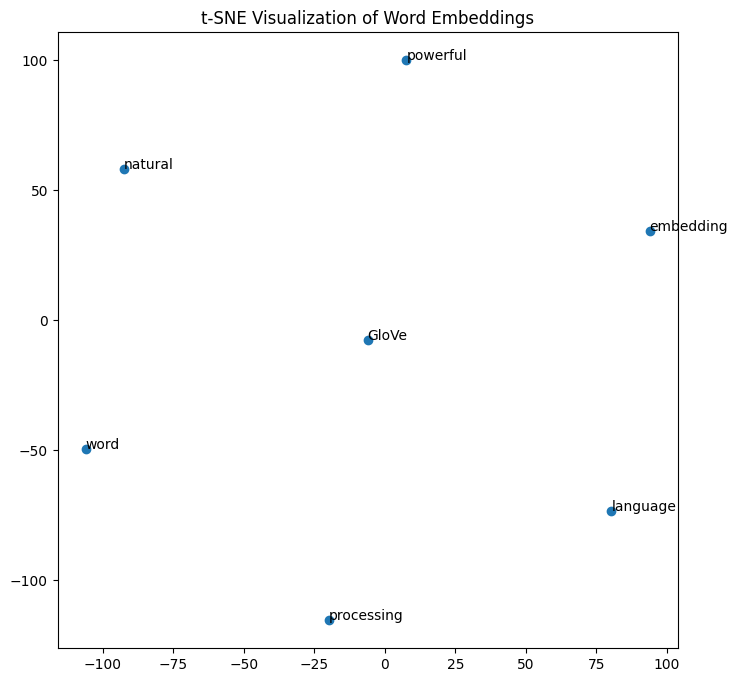

In [10]:
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the pre-trained GloVe model (in spaCy)
nlp = spacy.load("en_core_web_md")

# List of words for visualization
words_to_visualize = ["natural", "language", "processing", "GloVe", "powerful", "word", "embedding"]

# Get word embeddings for the selected words
word_vectors = [nlp(word).vector for word in words_to_visualize]

# Convert word_vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Ensure perplexity is less than the number of samples
perplexity = min(30, len(word_vectors_array) - 1)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_array)

# Plot the words in 2D space
plt.figure(figsize=(8, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


<font color="orange">

# 3.g) FAST TEXT

<FONT COLOR="SNOW">

- ### FastText is a library for efficient learning of word representations and sentence classification developed by Facebook AI Research (FAIR). It extends traditional word embedding models like Word2Vec by representing each word as a bag of character n-grams, which allows it to handle out-of-vocabulary (OOV) words more effectively.

In [11]:
from nltk.tokenize import word_tokenize
from gensim.models import FastText

# Dummy sentences
sentences = [
    "This is a sample sentence for FastText.",
    "FastText is a powerful word embedding model.",
    "We can train FastText on custom sentences too.",
    "Creating a simple example for demonstration.",
    "Let's check the similarity of some words."
]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train FastText model
model = FastText(
    sentences=tokenized_sentences,
    vector_size=128,
    window=5,
    min_count=1,  # Adjust min_count as needed
    workers=4,
    epochs=10,
    seed=42,
    sg=1,  # Skip-gram model
)

# Save the trained model
model.save('dummy_fasttext_model')

# Access the word vectors
ftext = model.wv

# Check the number of unique words in the model
print("Number of unique words:", len(ftext.index_to_key))

# Check the vector size
print("Vector size:", ftext.vector_size)

# Get the vector for a specific word
word_vector = ftext["fasttext"]
print("Vector for 'fasttext':", word_vector)

# Find similar words (adjusted to words present in the model)
similar_words_fasttext = ftext.similar_by_word("fasttext", topn=5)
print("Similar words to 'fasttext':", similar_words_fasttext)

similar_words_powerful = ftext.similar_by_word("powerful", topn=5)
print("Similar words to 'powerful':", similar_words_powerful)


Number of unique words: 31
Vector size: 128
Vector for 'fasttext': [-4.98031732e-04  1.72681102e-04 -8.47386254e-05  2.27859756e-03
  8.92896263e-04  3.49581242e-04 -8.55057617e-04 -3.98599310e-04
  9.64064617e-04 -6.45174470e-04  2.88390846e-04  5.65262453e-05
 -4.23705875e-04 -6.82594546e-04  8.28830409e-04  1.00176083e-03
 -2.00148323e-03  1.73650682e-03 -1.29093463e-03  3.55957483e-04
  4.24317222e-05 -8.21459282e-04 -2.77078041e-04 -6.49649184e-04
  8.73517536e-04 -3.08861985e-04 -7.99137109e-04 -1.82663347e-03
  1.87556288e-04  1.25339910e-04 -2.63656111e-04 -8.55624385e-04
  5.55895036e-04  7.09098938e-04  7.98384601e-04 -1.77128322e-03
  6.98002870e-04 -5.98518935e-04  1.86768814e-03  6.84162660e-04
  4.83201758e-04  1.39986238e-04 -6.21701882e-04 -5.26229327e-04
 -1.06013427e-03  4.31456428e-04 -2.71964062e-04  1.07383115e-04
  6.34527169e-05  1.15913659e-04  3.46912799e-04 -1.37849152e-03
 -5.68136165e-04 -1.15422753e-03  5.61428722e-04  1.03809393e-03
 -7.31351494e-04 -2.821

<font color = "orange">

# **INFERENCE**
<font color = "snow">


- ### In this lab, we explored different text vectorization techniques: One-hot encoding, Bag of Words (BoW), and Count Vectorizer focus on word presence and frequency, while TF-IDF improves by weighing terms based on their relevance. Word2Vec and GloVe generate dense, context-based word embeddings, with Word2Vec using context windows and GloVe relying on global word co-occurrence. FastText enhances Word2Vec by considering character n-grams, improving handling of rare words. Each method is useful depending on the application and the dataset.